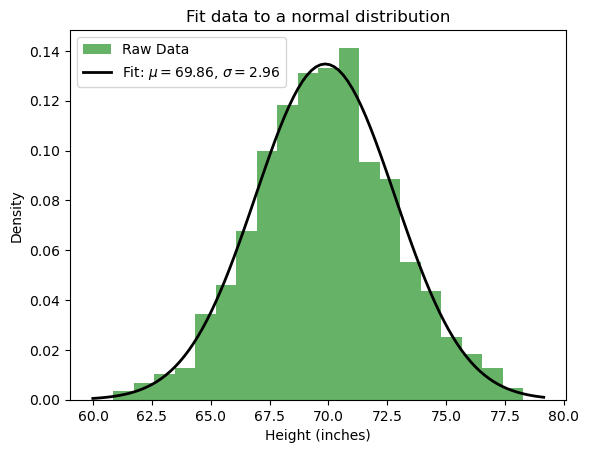

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Simulate raw data: 1000 men with an average height of 70 inches and a standard deviation of 3 inches
np.random.seed(0)  # for reproducibility
data = np.random.normal(70, 3, 1000)

# Calculate the mean and standard deviation of the sample
mean = np.mean(data)
std_dev = np.std(data)

# Create histogram
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', label="Raw Data")

# Create the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2, label=f"Fit: $\\mu={mean:.2f}$, $\\sigma={std_dev:.2f}$")

plt.title("Fit data to a normal distribution")
plt.xlabel("Height (inches)")
plt.ylabel("Density")
plt.legend()

plt.show()


In [5]:
# add a code to calculate the probability of a person less than 70.5 inches tall, between 71 and 75 inches tall and greater than 75 inches tall.
from scipy.stats import norm

# Assuming the mean (mu) and standard deviation (sigma) of the heights are known
mu = mean  # mean of height
sigma = std_dev  # standard deviation of height

# Probability of a person less than 70.5 inches tall
prob_less_than_70_5 = norm.cdf(70.5, mu, sigma)

# Probability of a person between 71 and 75 inches tall
prob_between_71_and_75 = norm.cdf(75, mu, sigma) - norm.cdf(71, mu, sigma)

# Probability of a person greater than 75 inches tall
prob_greater_than_75 = norm.sf(75, mu, sigma)  # sf = 1 - cdf

print(f"Probability of height < 70.5 inches: {prob_less_than_70_5}")
print(f"Probability of height between 71 and 75 inches: {prob_between_71_and_75}")
print(f"Probability of height > 75 inches: {prob_greater_than_75}")






Probability of height < 70.5 inches: 0.585002293739474
Probability of height between 71 and 75 inches: 0.30922854890070384
Probability of height > 75 inches: 0.0414223941818052


In [3]:
import pandas as pd

# Define the joint probability table
joint_probability_table = {
    'Happy': {'Sunny': 0.3, 'Cloudy': 0.2},
    'Sad': {'Sunny': 0.2, 'Cloudy': 0.3}
}

# Calculate marginal probabilities for mood
marginal_prob_happy = sum(joint_probability_table['Happy'].values())
marginal_prob_sad = sum(joint_probability_table['Sad'].values())

# Calculate marginal probabilities for weather
marginal_prob_sunny = joint_probability_table['Happy']['Sunny'] + joint_probability_table['Sad']['Sunny']
marginal_prob_cloudy = joint_probability_table['Happy']['Cloudy'] + joint_probability_table['Sad']['Cloudy']

# Calculate conditional probabilities
# P(Happy | Sunny) = P(Happy and Sunny) / P(Sunny)
conditional_prob_happy_given_sunny = joint_probability_table['Happy']['Sunny'] / marginal_prob_sunny

# P(Cloudy | Sad) = P(Cloudy and Sad) / P(Sad)
conditional_prob_cloudy_given_sad = joint_probability_table['Sad']['Cloudy'] / marginal_prob_sad

# Create a DataFrame for display
df = pd.DataFrame(joint_probability_table)
df.loc['Marginal Probability (Mood)'] = [marginal_prob_sunny, marginal_prob_cloudy]
df['Marginal Probability (Weather)'] = [marginal_prob_happy, marginal_prob_sad, 1.0]  # Add 1.0 for the last row

print("Joint and Marginal Probabilities Table:")
print(df)

print(f"\nP(Happy | Sunny) = P(Happy and Sunny) / P(Sunny): {conditional_prob_happy_given_sunny}")
print(f"P(Cloudy | Sad) = P(Cloudy and Sad) / P(Sad): {conditional_prob_cloudy_given_sad}")

# P(A and B) = P(A) * P(B | A) = P(B) * P(A | B) = P(B and A) therefore P(A | B) = P(A and B) / P(B)
#                                                                       P(B | A) = P(A and B) / P(A)



Joint and Marginal Probabilities Table:
                             Happy  Sad  Marginal Probability (Weather)
Sunny                          0.3  0.2                             0.5
Cloudy                         0.2  0.3                             0.5
Marginal Probability (Mood)    0.5  0.5                             1.0

P(Happy | Sunny) = P(Happy and Sunny) / P(Sunny): 0.6
P(Cloudy | Sad) = P(Cloudy and Sad) / P(Sad): 0.6
